In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.fft import fft 
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats.stats import pearsonr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy
import cartopy.feature as cfeat
import numpy.ma as ma
import time
import pandas as pd
from netCDF4 import Dataset
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#statistics
from scipy import signal,stats
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_21306/4163732201.py:9: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [3]:
import xarray as xr
import pandas as pd
from matplotlib.pyplot import plot, savefig
import matplotlib.colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
parameters = {'xtick.labelsize':14,
              'ytick.labelsize':14,
              'axes.labelsize':14,
              'axes.linewidth':2}
plt.rcParams.update(parameters)

In [5]:
import netCDF4
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [6]:
fname = '/home/wester/Desktop/SST/index_10_60d_rainfall_weekly_JJAS_1982-2019.nc'
ds = xr.open_dataset(fname)
lon1 = ds['longitude']
lat1 = ds['latitude']
Rainf = ds['__xarray_dataarray_variable__']
Rain = ds['__xarray_dataarray_variable__'].data
#Rain_1999_2010 = ds.sel(time=slice("1999-06","2010-09"))['__xarray_dataarray_variable__'].data

In [7]:
Rain.shape

(662, 100, 140)

In [8]:
Rain_index=np.reshape(Rain,(662,len(lat1)*len(lon1)))

In [9]:
index_10_60d=np.reshape(Rain,[662,100*140])

In [10]:
Rain_index=np.nanmean(np.reshape(Rain,(662,len(lat1)*len(lon1))),1)

In [11]:
OLR_0d=np.load('/home/wester/Desktop/SST/OLR/preduct_0d_weekly_olr.npy')
OLR_7d=np.load('/home/wester/Desktop/SST/OLR/preduct_7d_weekly_olr.npy')
OLR_14d=np.load('/home/wester/Desktop/SST/OLR/preduct_14d_weekly_olr.npy')
OLR_21d=np.load('/home/wester/Desktop/SST/OLR/preduct_21d_weekly_olr.npy')
OLR_28d=np.load('/home/wester/Desktop/SST/OLR/preduct_28d_weekly_olr.npy')
OLR_35d=np.load('/home/wester/Desktop/SST/OLR/preduct_35d_weekly_olr.npy')

In [12]:
U200_0d=np.load('/home/wester/Desktop/SST/wind/preduct_0d_weekly_u200.npy')
U200_7d=np.load('/home/wester/Desktop/SST/wind/preduct_7d_weekly_u200.npy')
U200_14d=np.load('/home/wester/Desktop/SST/wind/preduct_14d_weekly_u200.npy')
U200_21d=np.load('/home/wester/Desktop/SST/wind/preduct_21d_weekly_u200.npy')
U200_28d=np.load('/home/wester/Desktop/SST/wind/preduct_28d_weekly_u200.npy')
U200_35d=np.load('/home/wester/Desktop/SST/wind/preduct_35d_weekly_u200.npy')

In [13]:
U850_0d=np.load('/home/wester/Desktop/SST/wind/preduct_0d_weekly_u850.npy')
U850_7d=np.load('/home/wester/Desktop/SST/wind/preduct_7d_weekly_u850.npy')
U850_14d=np.load('/home/wester/Desktop/SST/wind/preduct_14d_weekly_u850.npy')
U850_21d=np.load('/home/wester/Desktop/SST/wind/preduct_21d_weekly_u850.npy')
U850_28d=np.load('/home/wester/Desktop/SST/wind/preduct_28d_weekly_u850.npy')
U850_35d=np.load('/home/wester/Desktop/SST/wind/preduct_35d_weekly_u850.npy')

In [14]:
H200_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp200.npy')
H200_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp200.npy')
H200_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp200.npy')
H200_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp200.npy')
H200_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp200.npy')
H200_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp200.npy')

In [15]:
H500_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp500.npy')
H500_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp500.npy')
H500_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp500.npy')
H500_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp500.npy')
H500_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp500.npy')
H500_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp500.npy')

In [16]:
H850_0d=np.load('/home/wester/Desktop/SST/ERA5/preduct_0d_weekly_gp850.npy')
H850_7d=np.load('/home/wester/Desktop/SST/ERA5/preduct_7d_weekly_gp850.npy')
H850_14d=np.load('/home/wester/Desktop/SST/ERA5/preduct_14d_weekly_gp850.npy')
H850_21d=np.load('/home/wester/Desktop/SST/ERA5/preduct_21d_weekly_gp850.npy')
H850_28d=np.load('/home/wester/Desktop/SST/ERA5/preduct_28d_weekly_gp850.npy')
H850_35d=np.load('/home/wester/Desktop/SST/ERA5/preduct_35d_weekly_gp850.npy')

In [17]:
delai_0d=[OLR_0d,U200_0d,U850_0d,H200_0d,H500_0d,H850_0d]
delai_7d=[OLR_7d,U200_7d,U850_7d,H200_7d,H500_7d,H850_7d]
delai_14d=[OLR_14d,U200_14d,U850_14d,H200_14d,H500_14d,H850_14d]
delai_21d=[OLR_21d,U200_21d,U850_21d,H200_21d,H500_21d,H850_21d]
delai_28d=[OLR_28d,U200_28d,U850_28d,H200_28d,H500_28d,H850_28d]
delai_35d=[OLR_35d,U200_35d,U850_35d,H200_35d,H500_35d,H850_35d]

In [18]:
delai_0dy= np.array(delai_0d)
delai_7dy= np.array(delai_7d)
delai_14dy= np.array(delai_14d)
delai_21dy= np.array(delai_21d)
delai_28dy= np.array(delai_28d)
delai_35dy= np.array(delai_35d)

In [19]:
aa0=np.transpose(delai_0dy)
aa7=np.transpose(delai_7dy)
aa14=np.transpose(delai_14dy)
aa21=np.transpose(delai_21dy)
aa28=np.transpose(delai_28dy)
aa35=np.transpose(delai_35dy)

In [20]:
aa28.shape

(662, 6)

In [21]:
Index_rain_SNG=np.transpose(Rain_index)

**Dans cette étude**, les signaux ISO des champs atmosphériques et de l'anomalie de précipitaton sont normalisés en utilisant la méthode de **(Yeo et Johnson, 2000)**.Pour la quantité de précipitation hébdomadaire, nous avons utilisé la **méthode de transformation log-sinh** proposée par **Wang et al. (2012)**, pour la normaliser.

In [22]:
from sklearn.preprocessing import PowerTransformer
# Initialiser un objet PowerTransformer avec la méthode de Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson')

In [23]:
delai_0days= yeo_johnson.fit_transform(aa0)
delai_7days= yeo_johnson.fit_transform(aa7)
delai_14days= yeo_johnson.fit_transform(aa14)
delai_21days= yeo_johnson.fit_transform(aa21)
delai_28days= yeo_johnson.fit_transform(aa28)
delai_35days= yeo_johnson.fit_transform(aa35)

In [24]:
Rain_Index=yeo_johnson.fit_transform(index_10_60d)

In [25]:
np.nanmax(Rain_Index)    , np.nanmax(delai_0days)

(7.337591908584754, 3.171624602640337)

In [26]:
Index_rain_SNG.shape

(662,)

In [27]:
rain_Index=np.squeeze(yeo_johnson.fit_transform(np.reshape(Index_rain_SNG,[662,1])))

In [28]:
 np.nanmax(rain_Index)     ,  np.nanmax(Rain_Index)

(3.3094515893142504, 7.337591908584754)

In [29]:
Rain_Index.shape 

(662, 14000)

In [30]:
Rain_Index[np.isnan(Rain_Index)] = 0

In [31]:
# Fonction pour calculer le coefficient de corrélation avec gestion des NaN
def correlation_coefficient(y_true, y_pred):
    if np.var(y_true) == 0 or np.var(y_pred) == 0:
        return 0  # Si la variance est nulle, la corrélation est 0
    else:
        return pearsonr(y_true, y_pred)[0]

In [32]:
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np
n_jobs = -1
# Nombre total de semaines (662) et les 17 semaines de validation par an
total_weeks = 662
weeks_per_year = 17
n_splits = total_weeks // weeks_per_year  # Le nombre de splits

# Créer un split de validation croisée en série temporelle
ts_cv = TimeSeriesSplit(n_splits=n_splits)
# Définition des scores à utiliser pour la validation croisée
scoring_mae = make_scorer(mean_absolute_error)
scoring_corr = make_scorer(correlation_coefficient)
n_jobs = -1

# Modèle Adaboost

In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [41]:
# Initialisation de l'objet AdaBoost Regressor
Reg_AB = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5))

# Paramètres pour la recherche de grille
param_grid = {
    'n_estimators': [100, 200, 300, 400],                    # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 0.5, 1.0]              # Taux d'apprentissage
}

# Définition du score pour l'évaluation
scoring = make_scorer(mean_absolute_error)

# Liste pour les scores moyens pour chaque délai
mean_scores_mae = []
mean_scores_corr = []

# Boucle sur chaque délai pour effectuer la recherche de grille et obtenir les scores
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']
# Boucle pour chaque délai avec recherche de grille et validation croisée
for delai, name in zip(delais, delai_names):
    grid_search = GridSearchCV(Reg_AB, param_grid=param_grid, cv=ts_cv, n_jobs=-1, scoring=scoring)
    grid_search.fit(delai, rain_Index)
    best_model = grid_search.best_estimator_

    # Calculer les scores MAE avec validation croisée pour le meilleur modèle
    scores = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=scoring)
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)

    scores_corr = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    print(f'Mean MAE for {name} (best model):', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)
# Sauvegarder les résultats
S2S_AB = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_Adaboost_1982-2019.npy', S2S_AB)
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35daysAdaboost_1982-2019..npy', S2S_corr)

Mean MAE for 0days (best model): 0.6533276003538554
Mean Correlation for 0days: 0.5462146250841379
Mean MAE for 7days (best model): 0.6859476567630954
Mean Correlation for 7days: 0.4601006574977709
Mean MAE for 14days (best model): 0.7044453719384715
Mean Correlation for 14days: 0.4619530668829206
Mean MAE for 21days (best model): 0.7485325403896741
Mean Correlation for 21days: 0.3880868732667519
Mean MAE for 28days (best model): 0.7537525946921327
Mean Correlation for 28days: 0.35231355934525294
Mean MAE for 35days (best model): 0.7428531051892783
Mean Correlation for 35days: 0.41892316282928826


# La régression Ridge

In [36]:
from sklearn.linear_model import Ridge
# Création d'un objet Ridge Regression
Reg_R = Ridge()

# Paramètres à tester pour la recherche de grille
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Définition du score à utiliser pour la recherche de grille
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# Dictionnaire pour stocker les scores moyens pour chaque horizon de prédiction
mean_scores_mae = []
mean_scores_corr = []

# Boucle sur chaque délai pour effectuer la recherche de grille et obtenir les scores
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']

for delai, name in zip(delais, delai_names):
    # Recherche de grille et validation croisée en une étape
    grid_search = GridSearchCV(Reg_R, param_grid=param_grid, cv=ts_cv, n_jobs=n_jobs, scoring=scoring)
    grid_search.fit(delai, rain_Index)
    
    # Meilleur modèle trouvé par GridSearchCV pour ce délai
    best_model = grid_search.best_estimator_
    
    # Obtenir les scores avec cross_val_score en utilisant le meilleur modèle
    scores = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(mean_absolute_error))
    # Calcul de la moyenne des scores pour ce délai
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)
    
    scores_corr = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    #print(f'Best alpha for {name}:', grid_search.best_params_['alpha'])
    print(f'Mean MAE for {name}:', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)
# Sauvegarder les scores moyens dans un fichier .npy
S2S = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_Ridge.npy', S2S)
# Sauvegarder les coefficients de corrélation dans un fichier .npy
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35days_Ridge.npy', S2S_corr)

Mean MAE for 0days: 0.650521493068869
Mean Correlation for 0days: 0.58191996131684
Mean MAE for 7days: 0.6625524090774443
Mean Correlation for 7days: 0.5483564903320016
Mean MAE for 14days: 0.6718659281942075
Mean Correlation for 14days: 0.5330589303340584
Mean MAE for 21days: 0.6981509006291153
Mean Correlation for 21days: 0.48678053069429833
Mean MAE for 28days: 0.6904907137948861
Mean Correlation for 28days: 0.4768874396894004
Mean MAE for 35days: 0.6973941780951813
Mean Correlation for 35days: 0.503589419095028


# Modèle de régression Linéaire

In [37]:
# Création d'un objet Linear Regression
Reg_LR = LinearRegression()

# Définition du score à utiliser pour la validation croisée
scoring = make_scorer(mean_absolute_error)

# Dictionnaire pour stocker les scores moyens pour chaque horizon de prédiction
mean_scores_mae = []
mean_scores_corr = []
# Boucle sur chaque délai pour effectuer la validation croisée
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']

for delai, name in zip(delais, delai_names):
    # Effectuer la validation croisée
    scores = cross_val_score(Reg_LR, delai, rain_Index, cv=ts_cv, scoring=scoring)
    
    # Calcul de la moyenne des scores pour ce délai
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)
    scores_corr = cross_val_score(Reg_LR, delai, rain_Index, cv=ts_cv, scoring=scoring_corr)
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    print(f'Mean MAE for {name}:', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)
# Sauvegarder les scores moyens dans un fichier .npy
S2S = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_RL.npy', S2S)
# Sauvegarder les coefficients de corrélation dans un fichier .npy
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35days_RL.npy', S2S_corr)

Mean MAE for 0days: 0.6544396789514488
Mean Correlation for 0days: 0.5762123979099534
Mean MAE for 7days: 0.6654477357770414
Mean Correlation for 7days: 0.5459573071605647
Mean MAE for 14days: 0.6734781433567918
Mean Correlation for 14days: 0.5285681407085904
Mean MAE for 21days: 0.7047174396773028
Mean Correlation for 21days: 0.4713615629260334
Mean MAE for 28days: 0.6934291490682459
Mean Correlation for 28days: 0.47385702664568047
Mean MAE for 35days: 0.6987603299550456
Mean Correlation for 35days: 0.4962372060295595


# Support-vector-regression

In [38]:
from sklearn.svm import SVR
# Création d'un objet SVR
Reg_SVR = SVR()

# Définition des paramètres à tester pour la recherche de grille
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Définition du score à utiliser pour la recherche de grille
scoring = make_scorer(mean_absolute_error)

# Dictionnaire pour stocker les meilleurs scores moyens pour chaque horizon de prédiction
mean_scores_mae = []
mean_scores_corr = []

# Boucle sur chaque délai pour effectuer la recherche de grille et la validation croisée
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']

for delai, name in zip(delais, delai_names):
    # Effectuer une recherche de grille pour trouver les meilleurs hyperparamètres pour chaque délai
    grid_search = GridSearchCV(Reg_SVR, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring)
    grid_search.fit(delai, rain_Index)
    
    # Meilleur modèle avec les hyperparamètres optimaux
    best_model = grid_search.best_estimator_
    
    # Validation croisée avec le meilleur modèle pour chaque délai
    scores = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=scoring)
    # Calcul de la moyenne des scores pour ce délai
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)
    scores_corr = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    print(f'Mean MAE for {name} (best model):', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)
    
# Sauvegarder les scores moyens dans un fichier .npy
S2S = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_SVR.npy', S2S)
# Sauvegarder les coefficients de corrélation dans un fichier .npy
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35days_SVR.npy', S2S_corr)

Mean MAE for 0days (best model): 0.8927028117520512
Mean Correlation for 0days: 0.36124090254893265
Mean MAE for 7days (best model): 0.9780761857186316
Mean Correlation for 7days: 0.23805474319943584
Mean MAE for 14days (best model): 0.9489542223870158
Mean Correlation for 14days: 0.3249688594834959
Mean MAE for 21days (best model): 1.0000401949844373
Mean Correlation for 21days: 0.19201892477548618
Mean MAE for 28days (best model): 0.9641832555047697
Mean Correlation for 28days: 0.20104067798212405
Mean MAE for 35days (best model): 0.9357181748523572
Mean Correlation for 35days: 0.3193194886799969


# Modèle de forêt aléatoire

In [39]:
from sklearn.ensemble import RandomForestRegressor
# Définition de l'objet Random Forest Regressor
Reg_RF = RandomForestRegressor()

# Paramètres pour la recherche de grille
param_grid = {
    'n_estimators': [50, 100, 200],      # Nombre d'arbres dans la forêt
    'max_depth': [10, 20, None],         # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],     # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]        # Minimum d'échantillons dans chaque feuille
}

# Définition du score à utiliser pour l'évaluation
scoring = make_scorer(mean_absolute_error)

# Initialisation de la liste pour les scores moyens pour chaque délai
mean_scores_mae = []
mean_scores_corr = []
# Boucle pour chaque délai avec recherche de grille et validation croisée
for delai, name in zip(delais, delai_names):
    grid_search = GridSearchCV(Reg_RF, param_grid=param_grid, cv=ts_cv, n_jobs=-1, scoring=scoring)
    grid_search.fit(delai, rain_Index)
    best_model = grid_search.best_estimator_

    # Calculer les scores MAE avec validation croisée pour le meilleur modèle
    scores = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=scoring)
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)

    scores_corr = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    print(f'Mean MAE for {name} (best model):', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)
    
# Sauvegarder les résultats
S2S_RF = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_RF.npy', S2S_RF)
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35days_RF.npy', S2S_corr)

Mean MAE for 0days (best model): 0.6587717825240288
Mean Correlation for 0days: 0.5286255805086618
Mean MAE for 7days (best model): 0.671627036682517
Mean Correlation for 7days: 0.4888308728934138
Mean MAE for 14days (best model): 0.7004340975726935
Mean Correlation for 14days: 0.46284333457299115
Mean MAE for 21days (best model): 0.7405966457327571
Mean Correlation for 21days: 0.3929918589508953
Mean MAE for 28days (best model): 0.7369364209630858
Mean Correlation for 28days: 0.3675558320980562
Mean MAE for 35days (best model): 0.7405849773684251
Mean Correlation for 35days: 0.42383236994312123


# Multi-layer Perceptron Regressor (MLPRegressor)

In [41]:
from sklearn.neural_network import MLPRegressor

# Création d'un objet MLP Regressor
Reg_MLP = MLPRegressor(max_iter=2500)

# Définition des paramètres pour la recherche de grille
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Utilisation du score MAE sans inversion de signe
scoring = make_scorer(mean_absolute_error)

# Dictionnaire pour stocker les meilleurs scores moyens pour chaque horizon de prédiction
mean_scores_mae = []
mean_scores_corr = []

# Boucle sur chaque délai pour effectuer la recherche de grille et la validation croisée
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
delai_names = ['0days', '7days', '14days', '21days', '28days', '35days']

for delai, name in zip(delais, delai_names):
    # Effectuer une recherche de grille pour trouver les meilleurs hyperparamètres pour chaque délai
    grid_search = GridSearchCV(Reg_MLP, param_grid=param_grid, cv=ts_cv, n_jobs=-1, scoring=scoring)
    grid_search.fit(delai, rain_Index)
    
    # Meilleur modèle avec les hyperparamètres optimaux
    best_model = grid_search.best_estimator_
    
    # Validation croisée avec le meilleur modèle pour chaque délai
    scores = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=scoring)
    # Calcul de la moyenne des scores pour ce délai
    mean_score = np.mean(scores)
    mean_scores_mae.append(mean_score)

    scores_corr = cross_val_score(best_model, delai, rain_Index, cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    mean_score_corr = np.mean(scores_corr)
    mean_scores_corr.append(mean_score_corr)
    
    print(f'Mean MAE for {name} (best model):', mean_score)
    print(f'Mean Correlation for {name}:', mean_score_corr)

# Sauvegarder les scores moyens dans un fichier .npy
S2S = np.array(mean_scores_mae)
np.save('/home/wester/Desktop/SST/donnees_models/mae_anom_rainfall_ATM_0-35days_MLP.npy', S2S)
S2S_corr = np.array(mean_scores_corr)
np.save('/home/wester/Desktop/SST/donnees_models/corr_anom_rainfall_ATM_0-35days_MLP.npy', S2S_corr)

Mean MAE for 0days (best model): 0.8184375353453984
Mean Correlation for 0days: 0.41434639705448584
Mean MAE for 7days (best model): 0.8798077882349183
Mean Correlation for 7days: 0.3544835551746513
Mean MAE for 14days (best model): 0.8808733361074929
Mean Correlation for 14days: 0.3356793896428192
Mean MAE for 21days (best model): 0.9086694837748961
Mean Correlation for 21days: 0.2315771873263179
Mean MAE for 28days (best model): 0.9104137644839051
Mean Correlation for 28days: 0.24755889574792095
Mean MAE for 35days (best model): 0.9317260592600406
Mean Correlation for 35days: 0.35238223453370887


# To see the spatial variability of scores

Pour intégrer GridSearchCV dans le calcul pour chaque point de grille et chaque délai, nous devons d'abord trouver les meilleurs hyperparamètres pour chaque délai en utilisant GridSearchCV puis les appliquer dans la boucle pour chaque point de grille.

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

# Paramètres pour la recherche de grille
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
scoring = make_scorer(mean_absolute_error)

# Trouver les meilleurs paramètres pour chaque délai
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
best_alphas = []

for delai in delais:
    grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=ts_cv, scoring=scoring)
    grid_search.fit(delai, Rain_Index)
    best_alphas.append(grid_search.best_params_['alpha'])

# Initialisation des listes pour stocker les scores pour chaque délai et chaque point de grille
score_0d, score_7d, score_14d, score_21d, score_28d, score_35d = [], [], [], [], [], []

# Boucle pour chaque point de grille
for i in range(len(Rain_Index[1])):
    # Calculer les scores de validation croisée avec les meilleurs alphas pour chaque délai
    score_0da = cross_val_score(Ridge(alpha=best_alphas[0]), delai_0days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)
    score_7da = cross_val_score(Ridge(alpha=best_alphas[1]), delai_7days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)
    score_14da = cross_val_score(Ridge(alpha=best_alphas[2]), delai_14days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)
    score_21da = cross_val_score(Ridge(alpha=best_alphas[3]), delai_21days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)
    score_28da = cross_val_score(Ridge(alpha=best_alphas[4]), delai_28days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)
    score_35da = cross_val_score(Ridge(alpha=best_alphas[5]), delai_35days, Rain_Index[:, i], cv=ts_cv, scoring=scoring)

    # Stocker les scores dans les listes correspondantes
    score_0d.append(score_0da)
    score_7d.append(score_7da)
    score_14d.append(score_14da)
    score_21d.append(score_21da)
    score_28d.append(score_28da)
    score_35d.append(score_35da)

# Calcul de la moyenne des scores pour chaque délai
mean_score_0d_MAE = np.mean(score_0d, axis=1)
mean_score_7d_MAE = np.mean(score_7d, axis=1)
mean_score_14d_MAE = np.mean(score_14d, axis=1)
mean_score_21d_MAE = np.mean(score_21d, axis=1)
mean_score_28d_MAE = np.mean(score_28d, axis=1)
mean_score_35d_MAE = np.mean(score_35d, axis=1)

In [34]:
mean_score_0d_MAE[mean_score_0d_MAE == 0.] = np.nan
mean_score_7d_MAE[mean_score_7d_MAE == 0.] = np.nan
mean_score_14d_MAE[mean_score_14d_MAE == 0.] = np.nan
mean_score_21d_MAE[mean_score_21d_MAE == 0.] = np.nan
mean_score_28d_MAE[mean_score_28d_MAE == 0.] = np.nan
mean_score_35d_MAE[mean_score_35d_MAE == 0.] = np.nan
# Enregistrement des résultats dans un fichier .npy
S2S = [mean_score_0d_MAE, mean_score_7d_MAE, mean_score_14d_MAE, mean_score_21d_MAE, mean_score_28d_MAE, mean_score_35d_MAE]
np.save('/home/wester/Desktop/SST/models_spatial/mae_anom_rainfall_ATM_0-35days_Ridge_grid.npy', S2S)

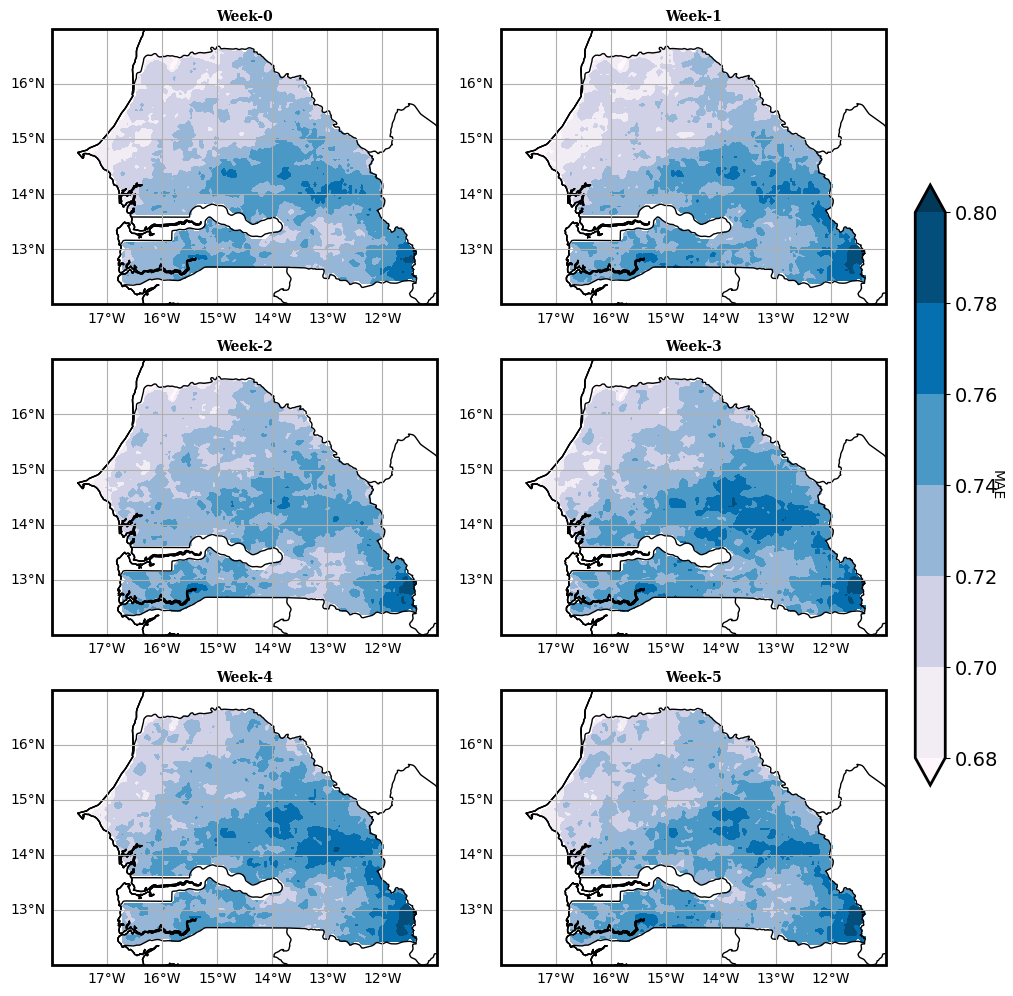

In [35]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15,12))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.72, bottom = 0.1, hspace= 0.2,wspace=0.01)               # adjust the space between subplots
axs = []
for i in range(6) :
    ax = f.add_subplot(3,2,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    #ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-18, -11, 17, 12],crs=ccrs.PlateCarree())
    axs.append(ax)
month = ['Week-0','Week-1','Week-2','Week-3','Week-4','Week-5']
step_arrows = [mean_score_0d_MAE, mean_score_7d_MAE, mean_score_14d_MAE, mean_score_21d_MAE, mean_score_28d_MAE, mean_score_35d_MAE]
for i in range(len(step_arrows)):
    date = step_arrows[i]    
    im = axs[i].contourf(lon1,lat1,date.reshape(len(lat1),len(lon1)),cmap='PuBu',levels=np.arange(0.68,0.82,0.02), extend='both',transform = ccrs.PlateCarree())
    axs[i].set_title(month[i],fontsize=10, weight='bold',family = 'serif')
    axs[i].coastlines()
    axs[i].add_feature(cfeat.COASTLINE,edgecolor = 'k')
    axs[i].add_feature(cfeat.BORDERS, linestyle='-',alpha=1)
cbar_ax = f.add_axes([0.72, 0.25, 0.02, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('MAE', rotation=270,fontsize=10)                             # add the title of the colorbar
#plt.subplots_adjust(hspace=0.3)
# Save figure
plt.savefig('/home/wester/Desktop/SST/ATM_prevision_Anom_rain_modele_leniaire_mae.png', bbox_inches='tight')
plt.show()

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

# Paramètres pour la recherche de grille
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
scoring = make_scorer(mean_absolute_error)

# Trouver les meilleurs paramètres pour chaque délai
delais = [delai_0days, delai_7days, delai_14days, delai_21days, delai_28days, delai_35days]
best_alphas = []

for delai in delais:
    grid_search = GridSearchCV(Ridge(), param_grid=param_grid, cv=ts_cv, scoring=scoring)
    grid_search.fit(delai, Rain_Index)
    best_alphas.append(grid_search.best_params_['alpha'])

# Initialisation des listes pour stocker les scores pour chaque délai et chaque point de grille
score_0d, score_7d, score_14d, score_21d, score_28d, score_35d = [], [], [], [], [], []

# Boucle pour chaque point de grille
for i in range(len(Rain_Index[1])):
    # Calculer les scores de validation croisée avec les meilleurs alphas pour chaque délai
    score_0da = cross_val_score(Ridge(alpha=best_alphas[0]), delai_0days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    score_7da = cross_val_score(Ridge(alpha=best_alphas[1]), delai_7days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    score_14da = cross_val_score(Ridge(alpha=best_alphas[2]), delai_14days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    score_21da = cross_val_score(Ridge(alpha=best_alphas[3]), delai_21days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    score_28da = cross_val_score(Ridge(alpha=best_alphas[4]), delai_28days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))
    score_35da = cross_val_score(Ridge(alpha=best_alphas[5]), delai_35days, Rain_Index[:, i], cv=ts_cv, scoring=make_scorer(correlation_coefficient))

    # Stocker les scores dans les listes correspondantes
    score_0d.append(score_0da)
    score_7d.append(score_7da)
    score_14d.append(score_14da)
    score_21d.append(score_21da)
    score_28d.append(score_28da)
    score_35d.append(score_35da)
# Calcul de la moyenne des scores pour chaque délai
mean_score_0d = np.mean(score_0d, axis=1)
mean_score_7d = np.mean(score_7d, axis=1)
mean_score_14d = np.mean(score_14d, axis=1)
mean_score_21d = np.mean(score_21d, axis=1)
mean_score_28d = np.mean(score_28d, axis=1)
mean_score_35d = np.mean(score_35d, axis=1)

In [37]:
mean_score_0d[mean_score_0d == 0.] = np.nan
mean_score_7d[mean_score_7d == 0.] = np.nan
mean_score_14d[mean_score_14d == 0.] = np.nan
mean_score_21d[mean_score_21d == 0.] = np.nan
mean_score_28d[mean_score_28d == 0.] = np.nan
mean_score_35d[mean_score_35d == 0.] = np.nan
# Enregistrement des résultats dans un fichier .npy
S2S = [mean_score_0d, mean_score_7d, mean_score_14d, mean_score_21d, mean_score_28d, mean_score_35d]
np.save('/home/wester/Desktop/SST/models_spatial/ACC_anom_rainfall_ATM_0-35days_Ridge_grid.npy', S2S)

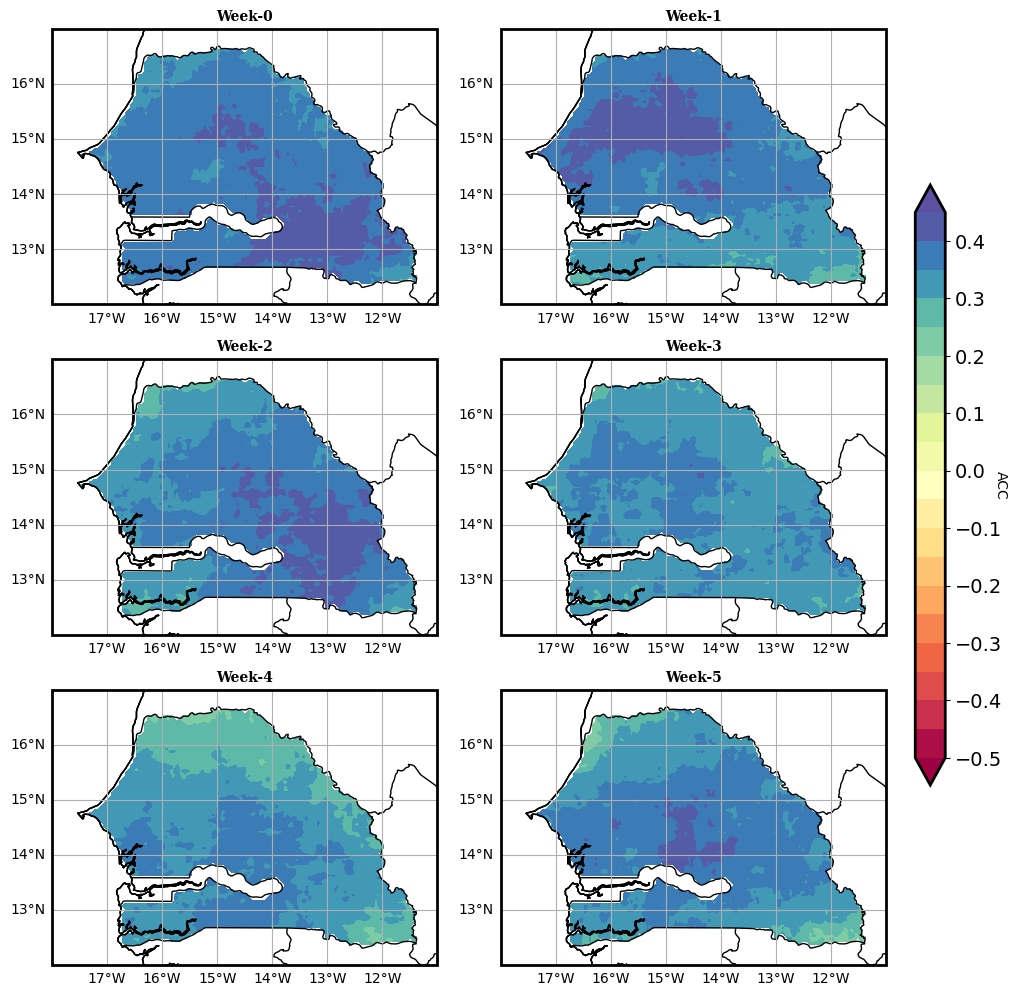

In [40]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15,12))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.72, bottom = 0.1, hspace= 0.2,wspace=0.01)               # adjust the space between subplots
axs = []
for i in range(6) :
    ax = f.add_subplot(3,2,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    #ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-18, -11, 17, 12],crs=ccrs.PlateCarree())
    axs.append(ax)
month = ['Week-0','Week-1','Week-2','Week-3','Week-4','Week-5']
step_arrows = [mean_score_0d, mean_score_7d, mean_score_14d, mean_score_21d, mean_score_28d, mean_score_35d]
for i in range(len(step_arrows)):
    date = step_arrows[i]    
    im = axs[i].contourf(lon1,lat1,date.reshape(len(lat1),len(lon1)),levels=np.arange(-0.5,0.5,0.05),cmap='Spectral', extend='both',transform = ccrs.PlateCarree())
    axs[i].set_title(month[i],fontsize=10, weight='bold',family = 'serif')
    axs[i].coastlines()
    axs[i].add_feature(cfeat.COASTLINE,edgecolor = 'k')
    axs[i].add_feature(cfeat.BORDERS, linestyle='-',alpha=1)
cbar_ax = f.add_axes([0.72, 0.25, 0.02, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('ACC', rotation=270,fontsize=10)                             # add the title of the colorbar
#plt.subplots_adjust(hspace=0.3)
# Save figure
plt.savefig('/home/wester/Desktop/SST/ATM_prevision_Anom_rain_modele_leniaire_ACC.png', bbox_inches='tight')
plt.show()